In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
from astropy.io import fits

if os.path.basename(os.getcwd()) != "RADIANT":
    print("Changing directory to RADIANT")
    os.chdir("..")
print(os.getcwd())

Changing directory to RADIANT
/home/dylan/RADIANT


In [6]:
#----->LOAD ALL THE DATA<-----
fits_dir = 'downloaded_images/same_pixels/'
directory = "MachineLearning/results/"
# directory = "older/NO_CLIPPING/FIRST/"

directory += 'FIRST.LOFAR.NVSS_same_3000a_30e_0.000251l_0.001r'

directory += "/"
X_train_folds = []
X_val_folds = []
y_train_folds = []
y_val_folds = []
losses = []
for filename in sorted(os.listdir(directory)):

    if filename.startswith("loss_fold"):
        loss = np.load(directory + filename, allow_pickle=True).item()
        losses.append(loss)

    elif filename.startswith("X_train"): X_train_folds.append(np.load(directory + filename, allow_pickle=True))
    elif filename.startswith("X_val"): X_val_folds.append(np.load(directory + filename, allow_pickle=True))
    elif filename.startswith("y_train"): y_train_folds.append(np.load(directory + filename, allow_pickle=True))
    elif filename.startswith("y_val"): y_val_folds.append(np.load(directory + filename, allow_pickle=True))


# Shape of data
# print("X_train_folds[0].shape:", X_train_folds[0].shape)

In [7]:
augmented_images = []
with open(directory + "augmented_images.txt", "rb") as f:
    while True:
        try:
            augmented_images.append(np.load(f, allow_pickle=True))
        except EOFError:
            break

In [8]:
def show_cut_off_images(source, dictionary):
    fig, ax = plt.subplots(2,3, figsize=(15,8))
    ax[0,0].imshow(dictionary[source]["LOFAR"])
    ax[0,0].set_title("LOFAR")
    ax[0,1].imshow(dictionary[source]["FIRST"])
    ax[0,1].set_title("FIRST")
    ax[0,2].imshow(dictionary[source]["NVSS"])
    ax[0,2].set_title("NVSS")
    
    for i, morph in enumerate(["LOFAR", "FIRST", "NVSS"]):
        im = dictionary[source][morph]
        minimum = np.nanmin(im)
        im = np.nan_to_num(im, nan=minimum)
        ax[1,i].imshow(im)
        ax[1,i].set_title(morph)

if os.path.exists(directory + "removed_empty_images.npy"):
    removed_empty_images = np.load(directory + "removed_empty_images.npy", allow_pickle=True)
    if len(removed_empty_images) > 0:
        print(f"Removed {len(removed_empty_images)} empty images")
        print(removed_empty_images)

if os.path.exists(directory + "cut_off_sources.npy"):
    cut_off_images = np.load(directory + "cut_off_sources.npy", allow_pickle=True)
    if len(cut_off_images) > 0:
        print(f"Cut off images: {len(cut_off_images)}")
        print(cut_off_images)
        
        valid_files = {}
        for filename in os.listdir(fits_dir):
            details = filename.split("_")
            source = int(details[0])
            if source in cut_off_images:
                morph = details[1]
                if source not in valid_files:
                    valid_files[source] = {"LOFAR": None, "FIRST": None, "NVSS": None}
                valid_files[source][morph] = fits.getdata(fits_dir + filename)                    
    
        interact(show_cut_off_images, source=cut_off_images, dictionary=fixed(valid_files))

In [9]:
def show_aug_images(augmented_images, index = 0, source=0):
    fig, ax = plt.subplots(1, 6, figsize=(20, 3))
    for i in range(6):

        if index >= len(augmented_images[source + i]): cmap = 'gray'; idx = len(augmented_images[source + i])-1
        else: cmap = 'viridis'; idx = index

#? ----------------------------------Make the zeros white----------------------------------
        # augmented_images[source + i][idx][augmented_images[source + i][idx] == 0] = np.nan
#? ----------------------------------------------------------------------------------------
        
        ax[i].imshow(augmented_images[source + i][idx], cmap=cmap)
        ax[i].axis('off')
        ax[i].set_title(f"{source + i}")
    fig.suptitle("Augmented Images")

# def show_images(name, fold, source, X_folds, y_folds):
#     fig, ax = plt.subplots(1, 6, figsize=(20, 4))
#     for i in range(6):

# #? ----------------------------------Make the zeros white----------------------------------
#         # X_folds[fold][source + i][X_folds[fold][source + i] == 0] = np.nan
# #? ----------------------------------------------------------------------------------------
        
#         ax[i].imshow(X_folds[fold][source + i])
#         ax[i].axis('off')
#         ax[i].set_title(y_folds[fold][source + i])
#     fig.suptitle(name)

largest_range = max([len(x) for x in augmented_images])
interact(show_aug_images, source=(0, len(augmented_images)-1-5), index=(0, largest_range-1), augmented_images=fixed(augmented_images))
# interact(show_images,name=fixed("Training"), fold=(0, len(X_train_folds)-1), source=(0, len(X_train_folds[0])-6), X_folds=fixed(X_train_folds), y_folds=fixed(y_train_folds))
# interact(show_images, name=fixed("Validation"), fold=(0, len(X_val_folds)-1), source=(0, len(X_val_folds[0])-6), X_folds=fixed(X_val_folds), y_folds=fixed(y_val_folds))

interactive(children=(IntSlider(value=0, description='index', max=18), IntSlider(value=0, description='source'…

<function __main__.show_aug_images(augmented_images, index=0, source=0)>

In [10]:
blue = '#1f77b4'
orange = '#ff7f0e'
green = '#2ca02c'
purple = '#9467bd'

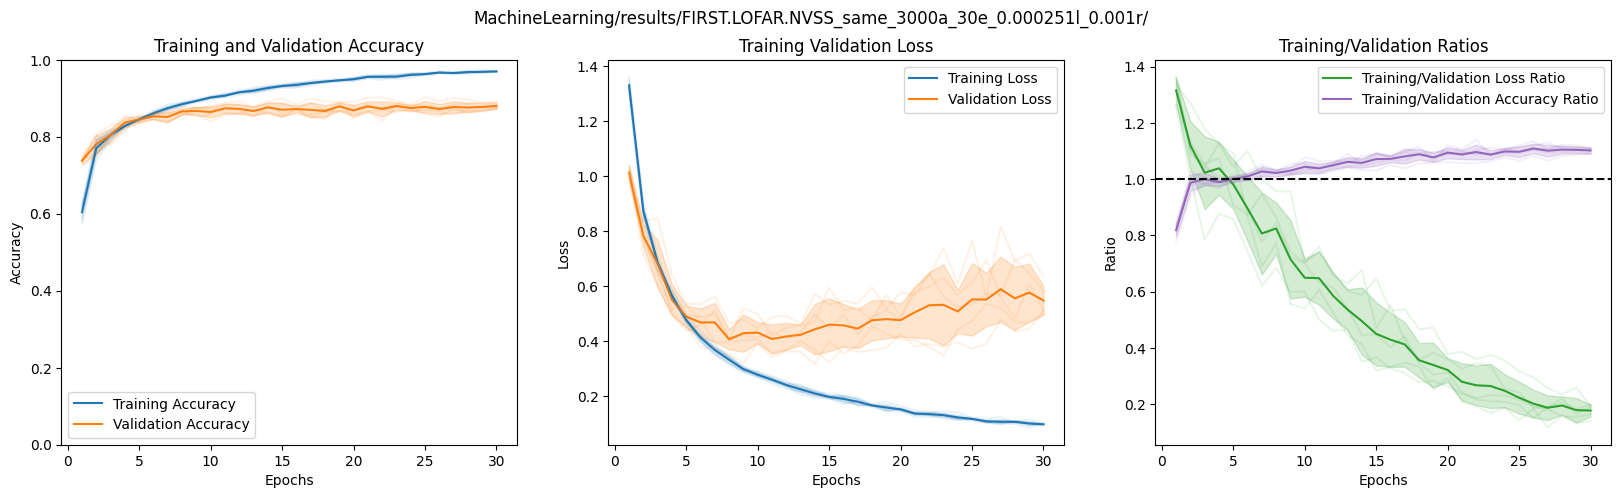

In [11]:
def show_image(directory):

    losses = []
    for filename in sorted(os.listdir(directory)):

        if filename.startswith("loss_fold"):
            loss = np.load(directory + "/" +filename, allow_pickle=True).item()
            losses.append(loss)

    blue = '#1f77b4'
    orange = '#ff7f0e'
    green = '#2ca02c'
    purple = '#9467bd'

    EPOCHS = len(loss['accuracy'])

    train_acc = np.array([loss['accuracy'] for loss in losses])
    train_acc_mean = np.mean(train_acc, axis=0)
    train_acc_std = np.std(train_acc, axis=0)
    val_acc = np.array([loss['val_accuracy'] for loss in losses])
    val_acc_mean = np.mean(val_acc, axis=0)
    val_acc_std = np.std(val_acc, axis=0)

    fig, ax = plt.subplots(1, 3, figsize=(20, 5))

    ax[0].plot(range(1, EPOCHS+1), train_acc_mean, label='Training Accuracy', color=blue)
    ax[0].plot(range(1, EPOCHS+1), val_acc_mean, label='Validation Accuracy', color=orange)
    for loss in losses:
        ax[0].plot(range(1, EPOCHS+1), loss['accuracy'], alpha=0.1, color=blue)
        ax[0].plot(range(1, EPOCHS+1), loss['val_accuracy'], alpha=0.1, color=orange)
    ax[0].fill_between(range(1, EPOCHS+1), train_acc_mean - train_acc_std, train_acc_mean + train_acc_std, alpha=0.2,)
    ax[0].fill_between(range(1, EPOCHS+1), val_acc_mean - val_acc_std, val_acc_mean + val_acc_std, alpha=0.2, color=orange)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_ylim(0,1)
    ax[0].set_title('Training and Validation Accuracy')
    ax[0].legend()

    train_loss = np.array([loss['loss'] for loss in losses])
    train_loss_mean = np.mean(train_loss, axis=0)
    train_loss_std = np.std(train_loss, axis=0)
    val_loss = np.array([loss['val_loss'] for loss in losses])
    val_loss_mean = np.mean(val_loss, axis=0)
    val_loss_std = np.std(val_loss, axis=0)

    ax[1].plot(range(1, EPOCHS+1), train_loss_mean, label='Training Loss', color=blue)
    ax[1].plot(range(1, EPOCHS+1), val_loss_mean, label='Validation Loss', color=orange)
    for loss in losses:
        ax[1].plot(range(1, EPOCHS+1), loss['loss'], alpha=0.1, color=blue)
        ax[1].plot(range(1, EPOCHS+1), loss['val_loss'], alpha=0.1, color=orange)
    ax[1].fill_between(range(1, EPOCHS+1), train_loss_mean - train_loss_std, train_loss_mean + train_loss_std, alpha=0.2,)
    ax[1].fill_between(range(1, EPOCHS+1), val_loss_mean - val_loss_std, val_loss_mean + val_loss_std, alpha=0.2, color=orange)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].set_title("Training Validation Loss")
    ax[1].legend()

    ratios_loss = []
    ratios_acc = []
    for l in losses:
        ratios_loss.append([l['loss'][i] / l['val_loss'][i] for i in range(EPOCHS)])
        ratios_acc.append([l['accuracy'][i] / l['val_accuracy'][i] for i in range(EPOCHS)])
    ratios_loss = np.array(ratios_loss)
    ratios_acc = np.array(ratios_acc)

    ratios_loss_mean = np.mean(ratios_loss, axis=0)
    ratios_acc_mean = np.mean(ratios_acc, axis=0)
    ratios_loss_std = np.std(ratios_loss, axis=0)
    ratios_acc_std = np.std(ratios_acc, axis=0)

    ax[2].plot(range(1, EPOCHS+1), ratios_loss_mean, label='Training/Validation Loss Ratio', color=green)
    ax[2].plot(range(1, EPOCHS+1), ratios_acc_mean, label='Training/Validation Accuracy Ratio', color=purple)
    for ratio_ac, ratio_lo in zip(ratios_acc,ratios_loss):
        ax[2].plot(range(1, EPOCHS+1), ratio_ac, alpha=0.1, color=purple)
        ax[2].plot(range(1, EPOCHS+1), ratio_lo, alpha=0.1, color=green)
    ax[2].fill_between(range(1, EPOCHS+1), ratios_loss_mean - ratios_loss_std, ratios_loss_mean + ratios_loss_std, alpha=0.2,color=green)
    ax[2].fill_between(range(1, EPOCHS+1), ratios_acc_mean - ratios_acc_std, ratios_acc_mean + ratios_acc_std, alpha=0.2, color=purple)
    ax[2].set_xlabel('Epochs')
    ax[2].set_ylabel('Ratio')
    ax[2].set_title('Training/Validation Ratios')
    ax[2].legend()
    ax[2].axhline(y=1, color='black', linestyle='--')

    fig.suptitle(directory)
    plt.show()

show_image(directory)